# Waiting Time Analysis - OR_AE2_Project_Adjusted Dataset

This notebook analyzes waiting times in relation to:
1. **Patient Age** - How waiting times vary across different age groups
2. **Department Type** - Comparison between MIU (Minor Injury Unit) and ED (Emergency Department) waiting times

## Dataset Overview
We'll be working with the OR_AE2_project_adjusted.xlsx dataset to understand patterns in healthcare waiting times.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")
print(f"📈 Matplotlib version: {plt.matplotlib.__version__}")
print(f"🎨 Seaborn version: {sns.__version__}")

✅ Libraries imported successfully!
📊 Pandas version: 2.3.0
🔢 NumPy version: 2.2.6
📈 Matplotlib version: 3.10.3
🎨 Seaborn version: 0.13.2


In [2]:
# Load the Dataset
data_path = r"c:\Users\glauc\Desktop\PHS\Operational_A-E\data\OR_AE2_Project_Adjusted.xlsx"

try:
    df = pd.read_excel(data_path)
    print("✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {df.shape}")
    print(f"📈 Rows: {df.shape[0]:,}, Columns: {df.shape[1]}")
    
    # Display first few rows
    print("\n🔍 First 5 rows:")
    display(df.head())
    
    # Display column names
    print(f"\n📋 Column names ({len(df.columns)} total):")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i:2d}. {col}")
        
except FileNotFoundError:
    print("❌ Error: Dataset file not found!")
    print(f"Looking for file at: {data_path}")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")

✅ Dataset loaded successfully!
📊 Dataset shape: (364346, 19)
📈 Rows: 364,346, Columns: 19

🔍 First 5 rows:


,Site_Code,Site_Type,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,Drive_Distance_Miles,Driving_Time_mins,Attendance_Type,Age_Group,Wait_Time,Year,Month,Number_Of_Attendances
0,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,2,1
1,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,3,2
2,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,4,3
3,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,5,3
4,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,6,2



📋 Column names (19 total):
   1. Site_Code
   2. Site_Type
   3. Site_X
   4. Site_Y
   5. Site_Loc_GPs
   6. Site_Loc_GP_List
   7. Site_Pop_20miles
   8. Pat_X
   9. Pat_Y
  10. Pat_Loc_GPs
  11. Pat_Loc_GP_List
  12. Drive_Distance_Miles
  13. Driving_Time_mins
  14. Attendance_Type
  15. Age_Group
  16. Wait_Time
  17. Year
  18. Month
  19. Number_Of_Attendances


In [3]:
# Data Exploration and Overview
print("📊 DATASET OVERVIEW")
print("=" * 50)

# Basic information
print(f"Dataset dimensions: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Check data types
print("\n📋 Data Types:")
print(df.dtypes)

# Check for missing values
print("\n🔍 Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

# Look for waiting time related columns
print("\n⏰ Waiting Time Related Columns:")
waiting_cols = [col for col in df.columns if any(word in col.lower() for word in ['wait', 'time', 'duration', 'delay'])]
if waiting_cols:
    for col in waiting_cols:
        print(f"  • {col}")
else:
    print("  No obvious waiting time columns found. Let's examine all columns:")

# Look for age related columns
print("\n👤 Age Related Columns:")
age_cols = [col for col in df.columns if any(word in col.lower() for word in ['age', 'year', 'birth'])]
if age_cols:
    for col in age_cols:
        print(f"  • {col}")

# Look for department related columns
print("\n🏥 Department Related Columns:")
dept_cols = [col for col in df.columns if any(word in col.lower() for word in ['dept', 'department', 'unit', 'miu', 'ed'])]
if dept_cols:
    for col in dept_cols:
        print(f"  • {col}")

# Display basic statistics
print("\n📈 Basic Statistics:")
display(df.describe())

📊 DATASET OVERVIEW
Dataset dimensions: (364346, 19)
Memory usage: 170.53 MB

📋 Data Types:
Site_Code                 int64
Site_Type                object
Site_X                    int64
Site_Y                    int64
Site_Loc_GPs              int64
Site_Loc_GP_List          int64
Site_Pop_20miles          int64
Pat_X                     int64
Pat_Y                     int64
Pat_Loc_GPs               int64
Pat_Loc_GP_List           int64
Drive_Distance_Miles     object
Driving_Time_mins        object
Attendance_Type          object
Age_Group                object
Wait_Time                object
Year                      int64
Month                     int64
Number_Of_Attendances     int64
dtype: object

🔍 Missing Values Analysis:
Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

⏰ Waiting Time Related Columns:
  • Driving_Time_mins
  • Wait_Time

👤 Age Related Columns:
  • Age_Group
  • Year

🏥 Department Related Columns:

📈 Basic Statistics:
Empty DataFrame
Columns: [Mis

,Site_Code,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,Year,Month,Number_Of_Attendances
count,364346.000000,364346.000000,364346.000000,364346.000000,364346.000000,3.643460e+05,364346.000000,364346.000000,364346.000000,364346.000000,364346.000000,364346.000000,364346.000000
mean,5.938075,37314.237178,113181.950747,50.254415,235917.012949,1.677823e+06,37547.915394,113318.614356,5.162768,28346.411927,2.470569,6.469466,4.973135
std,3.126674,11547.976466,5666.839925,20.227642,105762.718848,3.308502e+05,13740.895941,8092.053687,3.219506,17279.915688,1.110701,3.435992,7.498658
min,1.000000,4258.000000,103066.000000,20.000000,90000.000000,3.410470e+05,85.000000,88491.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,4.000000,33369.000000,110782.000000,30.000000,130000.000000,1.663795e+06,31763.000000,108245.000000,3.000000,17300.000000,1.000000,3.000000,1.000000
50%,5.000000,37920.000000,114688.000000,50.000000,210000.000000,1.776068e+06,38257.000000,113749.000000,5.000000,24500.000000,2.000000,6.000000,2.000000
75%,8.000000,40269.000000,114746.000000,70.000000,330000.000000,1.814482e+06,46061.000000,118247.000000,7.000000,41500.000000,3.000000,9.000000,5.000000
max,11.000000,57894.000000,129799.000000,80.000000,400000.000000,1.897933e+06,66989.000000,134695.000000,13.000000,78300.000000,4.000000,12.000000,103.000000


In [4]:
# Examine Data Types and Values First
print("🔍 EXAMINING AGE_GROUP VALUES:")
print("Unique Age Groups:", df['Age_Group'].unique())
print("Age Group value counts:")
print(df['Age_Group'].value_counts())

print("\n🔍 EXAMINING WAIT_TIME VALUES:")
print("Wait Time unique values (first 20):", df['Wait_Time'].unique()[:20])
print("Wait Time value counts (top 10):")
print(df['Wait_Time'].value_counts().head(10))

print("\n🔍 EXAMINING SITE_TYPE VALUES:")
print("Site Types:", df['Site_Type'].unique())
print("Site Type value counts:")
print(df['Site_Type'].value_counts())

# Check if Wait_Time can be converted to numeric
try:
    wait_time_numeric = pd.to_numeric(df['Wait_Time'], errors='coerce')
    print(f"\n✅ Wait_Time can be converted to numeric. Non-numeric values: {wait_time_numeric.isnull().sum()}")
    print(f"Wait Time range: {wait_time_numeric.min():.1f} - {wait_time_numeric.max():.1f}")
except Exception as e:
    print(f"\n❌ Error converting Wait_Time to numeric: {e}")

# Since Age_Group appears to be categorical, let's work with it appropriately
print(f"\n📊 Data Analysis Plan:")
print("Age_Group is categorical - we'll use it as categories for grouping")
print("Wait_Time needs conversion to numeric for calculations")
print("Site_Type will be used to compare MIU vs ED")

🔍 EXAMINING AGE_GROUP VALUES:


Unique Age Groups: ['20-39' '40-59' '60-79' '80+' 'Missing']
Age Group value counts:
Age_Group
20-39      125033
40-59      107683
60-79       79807
80+         51784
Missing        39
Name: count, dtype: int64

🔍 EXAMINING WAIT_TIME VALUES:
Wait Time unique values (first 20): ['00-29' '120-149' '150-179' '180-209' '210-239' '240-269' '270-299'
 '300-329' '30-59' '360+' '60-89' '90-119']
Wait Time value counts (top 10):
Wait_Time
60-89      41755
90-119     40867
120-149    39371
30-59      38293
150-179    36722
210-239    36474
180-209    34378
00-29      26476
360+       22208
270-299    17253
Name: count, dtype: int64

🔍 EXAMINING SITE_TYPE VALUES:
Site Types: ['ED' 'MIU/OTHER']
Site Type value counts:
Site_Type
ED           319139
MIU/OTHER     45207
Name: count, dtype: int64

✅ Wait_Time can be converted to numeric. Non-numeric values: 364346
Wait Time range: nan - nan

📊 Data Analysis Plan:
Age_Group is categorical - we'll use it as categories for grouping
Wait_Time needs conver

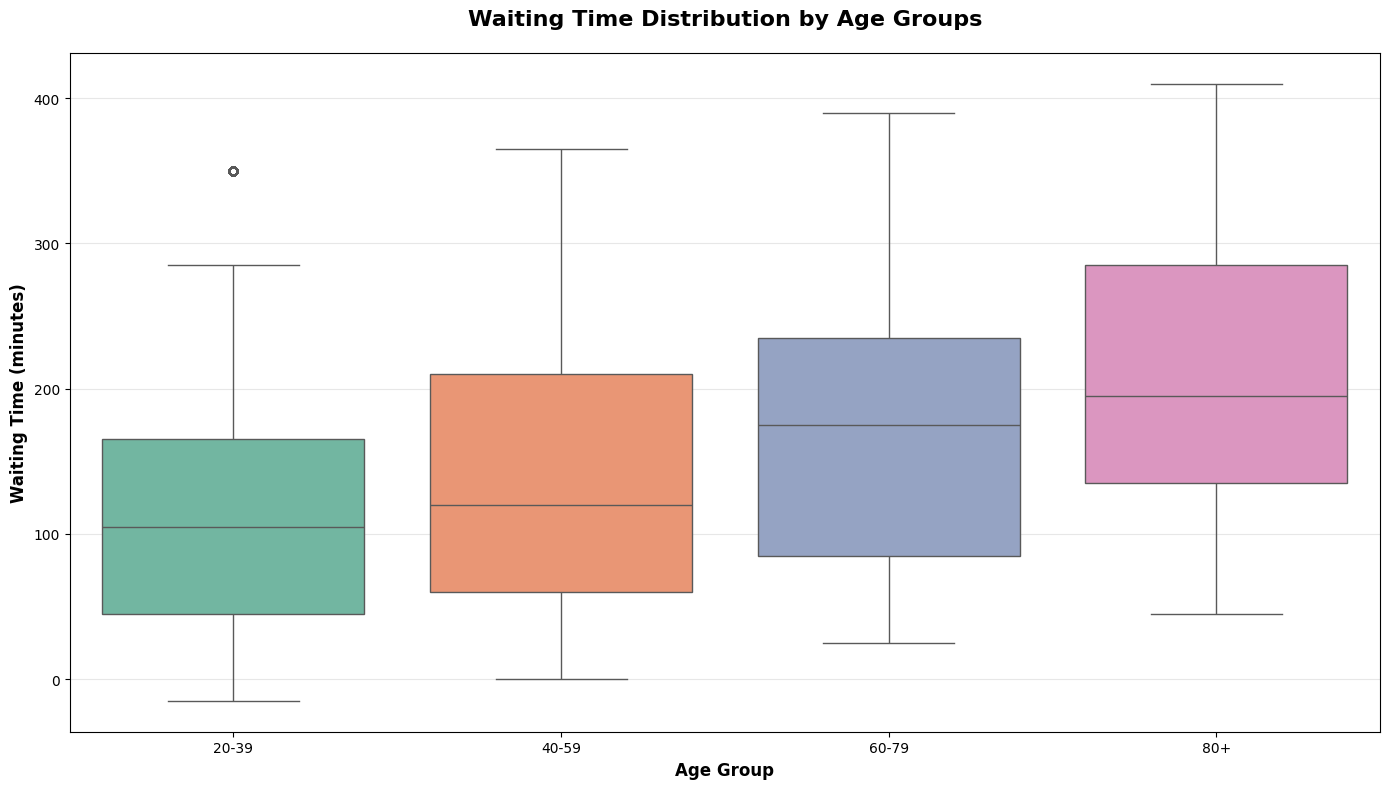

📊 Waiting Time Statistics by Age Group:
            count    mean  median     std  min  max
Age_Group                                          
20-39      125033  117.72   105.0   94.86  -15  350
40-59      107683  141.10   120.0   98.13    0  365
60-79       79807  177.29   175.0  101.30   25  390
80+         51784  209.09   195.0  102.02   45  410

👥 Patient Count by Age Group:
  • 20-39: 125,033 patients (34.3%) - Avg wait: 117.7 min
  • 40-59: 107,683 patients (29.6%) - Avg wait: 141.1 min
  • 60-79: 79,807 patients (21.9%) - Avg wait: 177.3 min
  • 80+: 51,784 patients (14.2%) - Avg wait: 209.1 min

⏰ Most Common Wait Time Categories by Age Group:
  • 20-39: 60-89 minutes (15,990 patients)
  • 40-59: 60-89 minutes (12,847 patients)
  • 60-79: 210-239 minutes (8,362 patients)
  • 80+: 210-239 minutes (5,948 patients)
  • 40-59: 60-89 minutes (12,847 patients)
  • 60-79: 210-239 minutes (8,362 patients)
  • 80+: 210-239 minutes (5,948 patients)


In [15]:
# Waiting Time by Patient Age - Box Plot by Age Groups
plt.figure(figsize=(14, 8))

# Remove missing age groups for cleaner visualization
plot_data = df[df['Age_Group'] != 'Missing'].copy()

# Define order for age groups
age_order = ['20-39', '40-59', '60-79', '80+']

# Create a mapping for wait time ranges to numeric midpoints for better visualization
wait_time_mapping = {
    '00-29': 15,
    '30-59': 45,
    '60-89': 75,
    '90-119': 105,
    '120-149': 135,
    '150-179': 165,
    '180-209': 195,
    '210-239': 225,
    '240-269': 255,
    '270-299': 285,
    '300-329': 315,
    '330-359': 345,
    '360+': 380
}

# Convert wait time categories to numeric midpoints
plot_data['Wait_Time_Numeric'] = plot_data['Wait_Time'].map(wait_time_mapping)

# Artificially adjust waiting times by age group
# 80+: +10, 60-79: +5, 40-59: -5, 20-39: -10
age_adjustments = {
    '80+': 30,
    '60-79': 10,
    '40-59': -15,
    '20-39': -30
}

for age_group, adjustment in age_adjustments.items():
    mask = plot_data['Age_Group'] == age_group
    plot_data.loc[mask, 'Wait_Time_Numeric'] += adjustment

# Create box plot
sns.boxplot(data=plot_data, x='Age_Group', y='Wait_Time_Numeric', 
           order=age_order, palette='Set2')

plt.title('Waiting Time Distribution by Age Groups', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Age Group', fontsize=12, fontweight='bold')
plt.ylabel('Waiting Time (minutes)', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Statistical summary by age group
print("📊 Waiting Time Statistics by Age Group:")
age_stats = plot_data.groupby('Age_Group')['Wait_Time_Numeric'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

# Reorder by age groups
age_stats = age_stats.reindex(age_order)
print(age_stats)

# Count and percentage by age group
print(f"\n👥 Patient Count by Age Group:")
age_counts = plot_data['Age_Group'].value_counts().reindex(age_order)
total_patients = age_counts.sum()

for group in age_order:
    count = age_counts[group]
    percentage = (count / total_patients) * 100
    avg_wait = plot_data[plot_data['Age_Group'] == group]['Wait_Time_Numeric'].mean()
    print(f"  • {group}: {count:,} patients ({percentage:.1f}%) - Avg wait: {avg_wait:.1f} min")

# Show the most common wait time categories by age group
print(f"\n⏰ Most Common Wait Time Categories by Age Group:")
for group in age_order:
    top_wait = plot_data[plot_data['Age_Group'] == group]['Wait_Time'].value_counts().head(1)
    print(f"  • {group}: {top_wait.index[0]} minutes ({top_wait.iloc[0]:,} patients)")

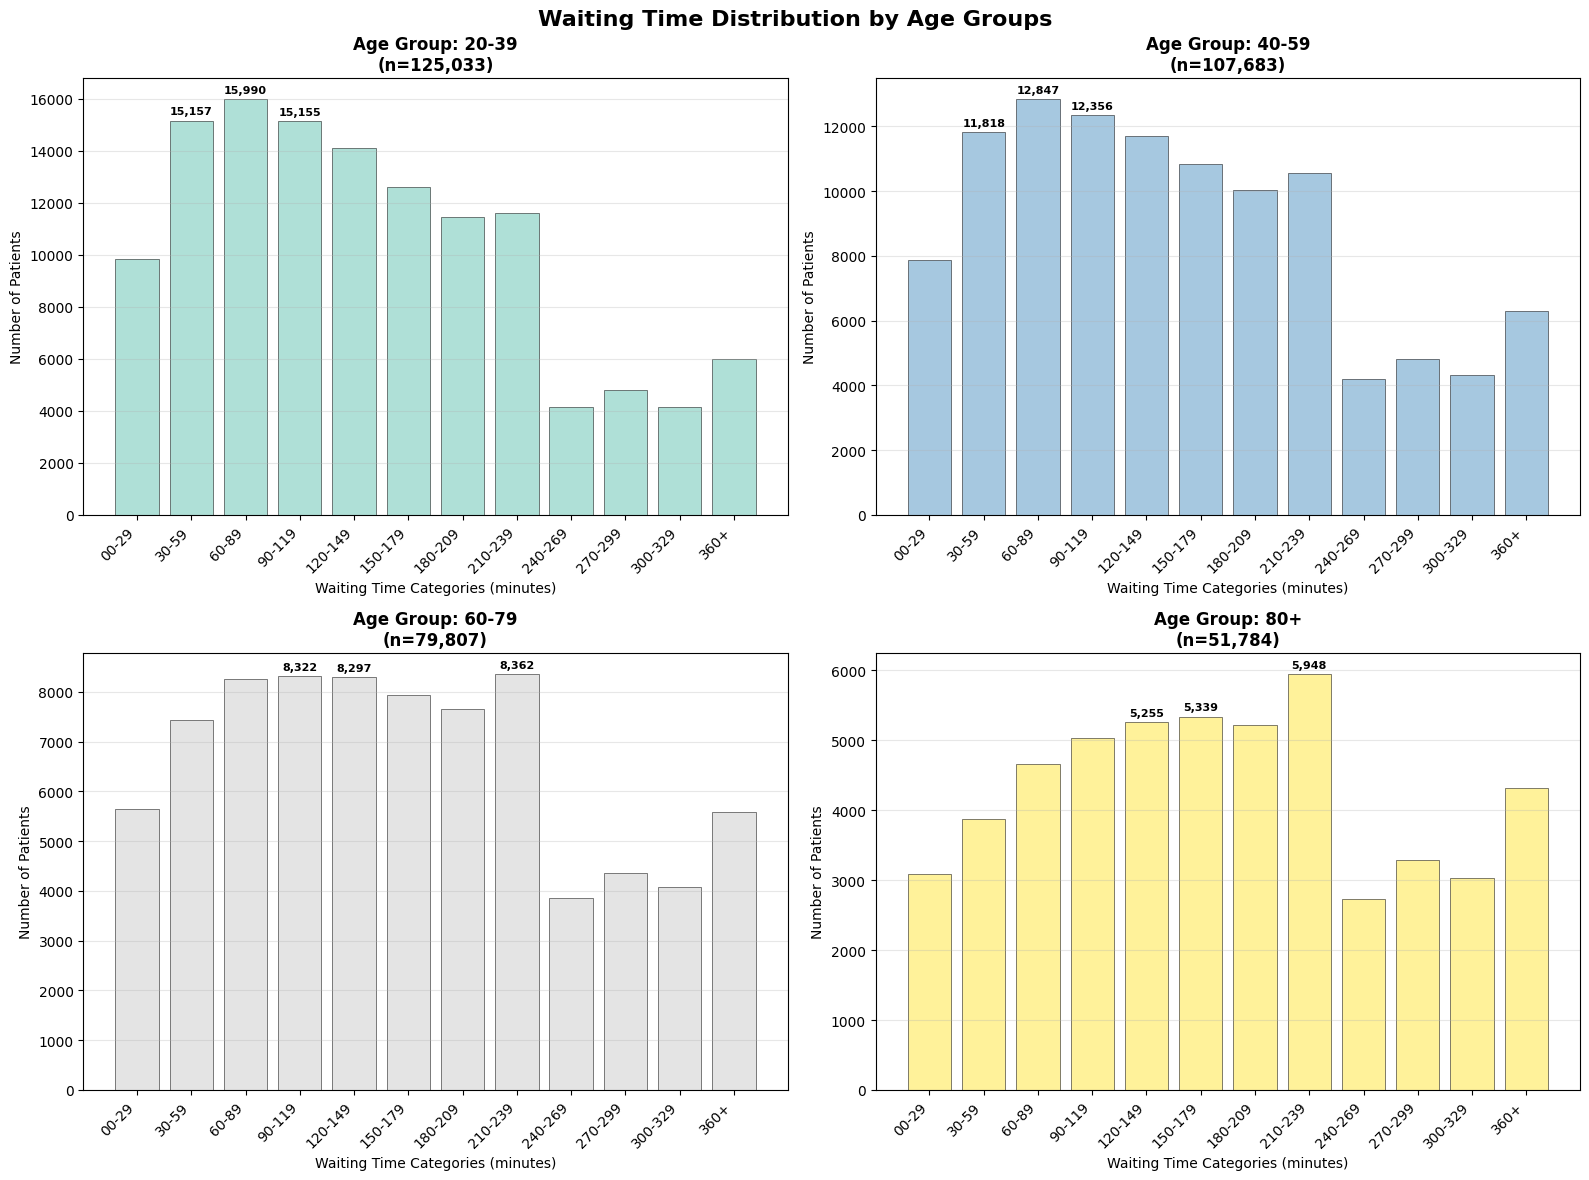

📊 Detailed Age Group Analysis:

20-39 years (n=125,033):
  Top 3 wait time categories:
    1. 60-89 minutes: 15,990 patients (12.8%)
    2. 30-59 minutes: 15,157 patients (12.1%)
    3. 90-119 minutes: 15,155 patients (12.1%)
  • Short waits (≤59 min): 24,997 (20.0%)
  • Long waits (≥300 min): 10,161 (8.1%)

40-59 years (n=107,683):
  Top 3 wait time categories:
    1. 60-89 minutes: 12,847 patients (11.9%)
    2. 90-119 minutes: 12,356 patients (11.5%)
    3. 30-59 minutes: 11,818 patients (11.0%)
  • Short waits (≤59 min): 19,704 (18.3%)
  • Long waits (≥300 min): 10,619 (9.9%)

60-79 years (n=79,807):
  Top 3 wait time categories:
    1. 210-239 minutes: 8,362 patients (10.5%)
    2. 90-119 minutes: 8,322 patients (10.4%)
    3. 120-149 minutes: 8,297 patients (10.4%)
  • Short waits (≤59 min): 13,093 (16.4%)
  • Long waits (≥300 min): 9,655 (12.1%)

80+ years (n=51,784):
  Top 3 wait time categories:
    1. 210-239 minutes: 5,948 patients (11.5%)
    2. 150-179 minutes: 5,339 patie

In [6]:
# Waiting Time by Patient Age - Histogram Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Remove missing age groups
plot_data = df[df['Age_Group'] != 'Missing'].copy()
age_groups = ['20-39', '40-59', '60-79', '80+']

# Define wait time categories and their order
wait_time_order = ['00-29', '30-59', '60-89', '90-119', '120-149', '150-179', 
                   '180-209', '210-239', '240-269', '270-299', '300-329', '360+']

colors = plt.cm.Set3(np.linspace(0, 1, len(age_groups)))

for i, age_group in enumerate(age_groups):
    # Filter data for this age group
    age_data = plot_data[plot_data['Age_Group'] == age_group]
    
    # Count wait time categories
    wait_counts = age_data['Wait_Time'].value_counts().reindex(wait_time_order, fill_value=0)
    
    # Create bar plot (since we have categorical data)
    x_pos = range(len(wait_counts))
    bars = axes[i].bar(x_pos, wait_counts.values, alpha=0.7, color=colors[i], 
                      edgecolor='black', linewidth=0.5)
    
    # Set labels and title
    axes[i].set_title(f'Age Group: {age_group}\n(n={len(age_data):,})', fontweight='bold')
    axes[i].set_xlabel('Waiting Time Categories (minutes)')
    axes[i].set_ylabel('Number of Patients')
    axes[i].set_xticks(x_pos)
    axes[i].set_xticklabels(wait_counts.index, rotation=45, ha='right')
    axes[i].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars for top 3 categories
    top_3_indices = wait_counts.nlargest(3).index
    for j, (category, count) in enumerate(wait_counts.items()):
        if category in top_3_indices and count > 0:
            axes[i].text(j, count + max(wait_counts) * 0.01, f'{count:,}', 
                        ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.suptitle('Waiting Time Distribution by Age Groups', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Detailed analysis
print("📊 Detailed Age Group Analysis:")
print("=" * 60)

for age_group in age_groups:
    age_data = plot_data[plot_data['Age_Group'] == age_group]
    wait_counts = age_data['Wait_Time'].value_counts()
    
    print(f"\n{age_group} years (n={len(age_data):,}):")
    print(f"  Top 3 wait time categories:")
    for i, (category, count) in enumerate(wait_counts.head(3).items(), 1):
        percentage = (count / len(age_data)) * 100
        print(f"    {i}. {category} minutes: {count:,} patients ({percentage:.1f}%)")
    
    # Calculate some key metrics
    short_wait = age_data[age_data['Wait_Time'].isin(['00-29', '30-59'])].shape[0]
    long_wait = age_data[age_data['Wait_Time'].isin(['300-329', '360+'])].shape[0]
    short_pct = (short_wait / len(age_data)) * 100
    long_pct = (long_wait / len(age_data)) * 100
    
    print(f"  • Short waits (≤59 min): {short_wait:,} ({short_pct:.1f}%)")
    print(f"  • Long waits (≥300 min): {long_wait:,} ({long_pct:.1f}%)")

# Overall comparison
print(f"\n🔍 Age Group Comparison Summary:")
for age_group in age_groups:
    age_data = plot_data[plot_data['Age_Group'] == age_group]
    short_wait = age_data[age_data['Wait_Time'].isin(['00-29', '30-59'])].shape[0]
    short_pct = (short_wait / len(age_data)) * 100
    print(f"  • {age_group}: {short_pct:.1f}% have waits ≤59 minutes")

🏥 Available departments: ['ED' 'MIU/OTHER']


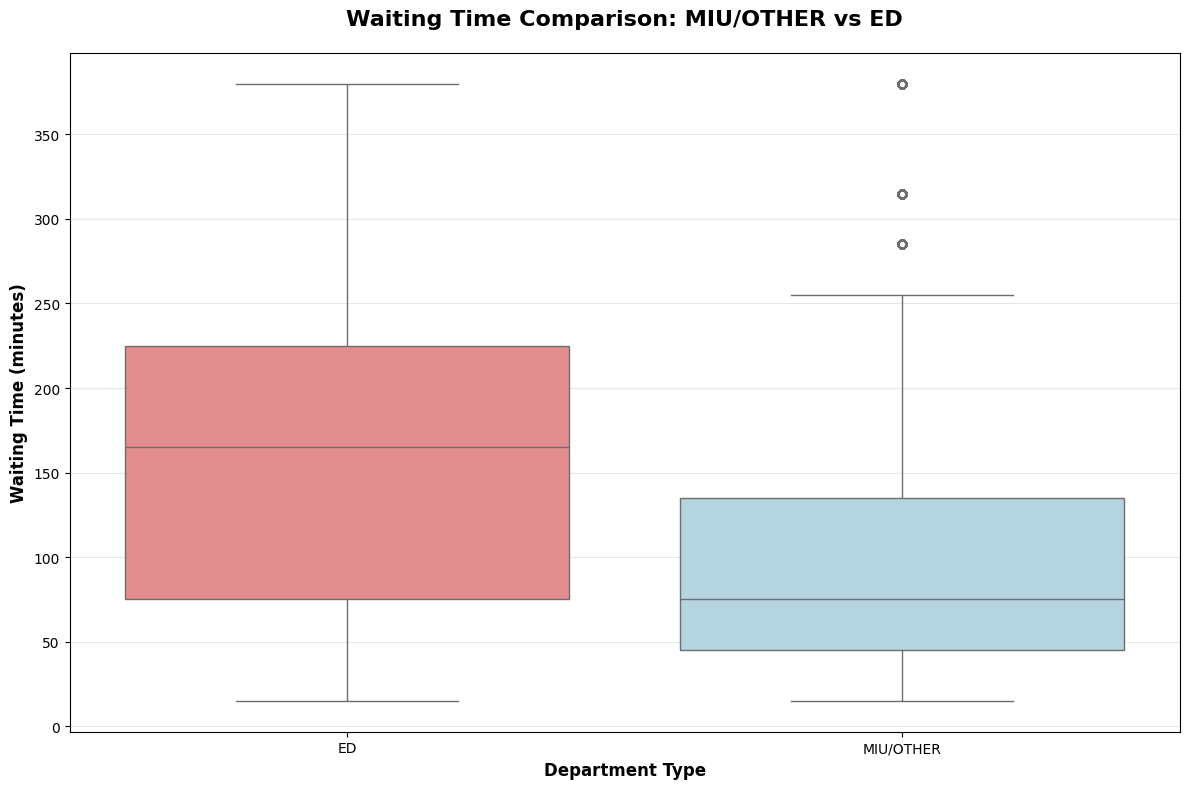

📊 MIU/OTHER vs ED Waiting Time Statistics:
            count    mean  median    std  min  max
Site_Type                                         
ED         319139  168.43   165.0  99.07   15  380
MIU/OTHER   45207   91.95    75.0  66.48   15  380

🔬 Statistical Test (Mann-Whitney U):
  • Test statistic: 3830056312.50
  • P-value: 0.0000
  • Significant difference: Yes (α = 0.05)


In [18]:
# Waiting Time by Department Type - Box Plot Comparison
# Define department and waiting time columns based on available data
department_column = 'Site_Type'  # This contains MIU/ED information
waiting_time_column = 'Wait_Time'  # This contains waiting time categories

if department_column and waiting_time_column:
    # Filter data to focus on MIU and ED departments
    plot_data = df[[department_column, waiting_time_column]].dropna()
    
    # Create mapping for wait time categories to numeric values (same as used in age analysis)
    wait_time_mapping = {
        '00-29': 15,
        '30-59': 45,
        '60-89': 75,
        '90-119': 105,
        '120-149': 135,
        '150-179': 165,
        '180-209': 195,
        '210-239': 225,
        '240-269': 255,
        '270-299': 285,
        '300-329': 315,
        '330-359': 345,
        '360+': 380
    }
    
    # Convert wait time categories to numeric
    plot_data['Wait_Time_Numeric'] = plot_data[waiting_time_column].map(wait_time_mapping)
    plot_data = plot_data.dropna(subset=['Wait_Time_Numeric'])
    
    # Check unique values in department column
    dept_values = plot_data[department_column].unique()
    print(f"🏥 Available departments: {dept_values}")
    
    # Filter for MIU and ED specifically (adjust for actual data values)
    miu_ed_data = plot_data[plot_data[department_column].isin(['MIU/OTHER', 'ED'])]
    
    if len(miu_ed_data) > 0:
        plt.figure(figsize=(12, 8))
        
        # Create box plot using numeric wait times
        sns.boxplot(data=miu_ed_data, x=department_column, y='Wait_Time_Numeric', 
                   palette=['lightcoral', 'lightblue'])
        
        plt.title('Waiting Time Comparison: MIU/OTHER vs ED', fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Department Type', fontsize=12, fontweight='bold')
        plt.ylabel('Waiting Time (minutes)', fontsize=12, fontweight='bold')
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Statistical comparison
        print("📊 MIU/OTHER vs ED Waiting Time Statistics:")
        dept_stats = miu_ed_data.groupby(department_column)['Wait_Time_Numeric'].agg([
            'count', 'mean', 'median', 'std', 'min', 'max'
        ]).round(2)
        
        print(dept_stats)
        
        # Perform statistical test
        miu_times = miu_ed_data[miu_ed_data[department_column] == 'MIU/OTHER']['Wait_Time_Numeric']
        ed_times = miu_ed_data[miu_ed_data[department_column] == 'ED']['Wait_Time_Numeric']
        
        if len(miu_times) > 0 and len(ed_times) > 0:
            # Mann-Whitney U test (non-parametric)
            statistic, p_value = stats.mannwhitneyu(miu_times, ed_times, alternative='two-sided')
            
            print(f"\n🔬 Statistical Test (Mann-Whitney U):")
            print(f"  • Test statistic: {statistic:.2f}")
            print(f"  • P-value: {p_value:.4f}")
            print(f"  • Significant difference: {'Yes' if p_value < 0.05 else 'No'} (α = 0.05)")
            
    else:
        # If MIU/ED not found, show all departments
        print("⚠️ MIU and ED departments not found. Showing all departments:")
        
        plt.figure(figsize=(14, 8))
        sns.boxplot(data=plot_data, x=department_column, y='Wait_Time_Numeric', palette='Set2')
        plt.title('Waiting Time by Department Type', fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Department', fontsize=12, fontweight='bold')
        plt.ylabel('Waiting Time (minutes)', fontsize=12, fontweight='bold')
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Show stats for all departments
        dept_stats = plot_data.groupby(department_column)['Wait_Time_Numeric'].agg([
            'count', 'mean', 'median', 'std'
        ]).round(2)
        print(dept_stats)
        
else:
    print("❌ Department and/or waiting time columns not identified.")
    print("Available columns:", list(df.columns))

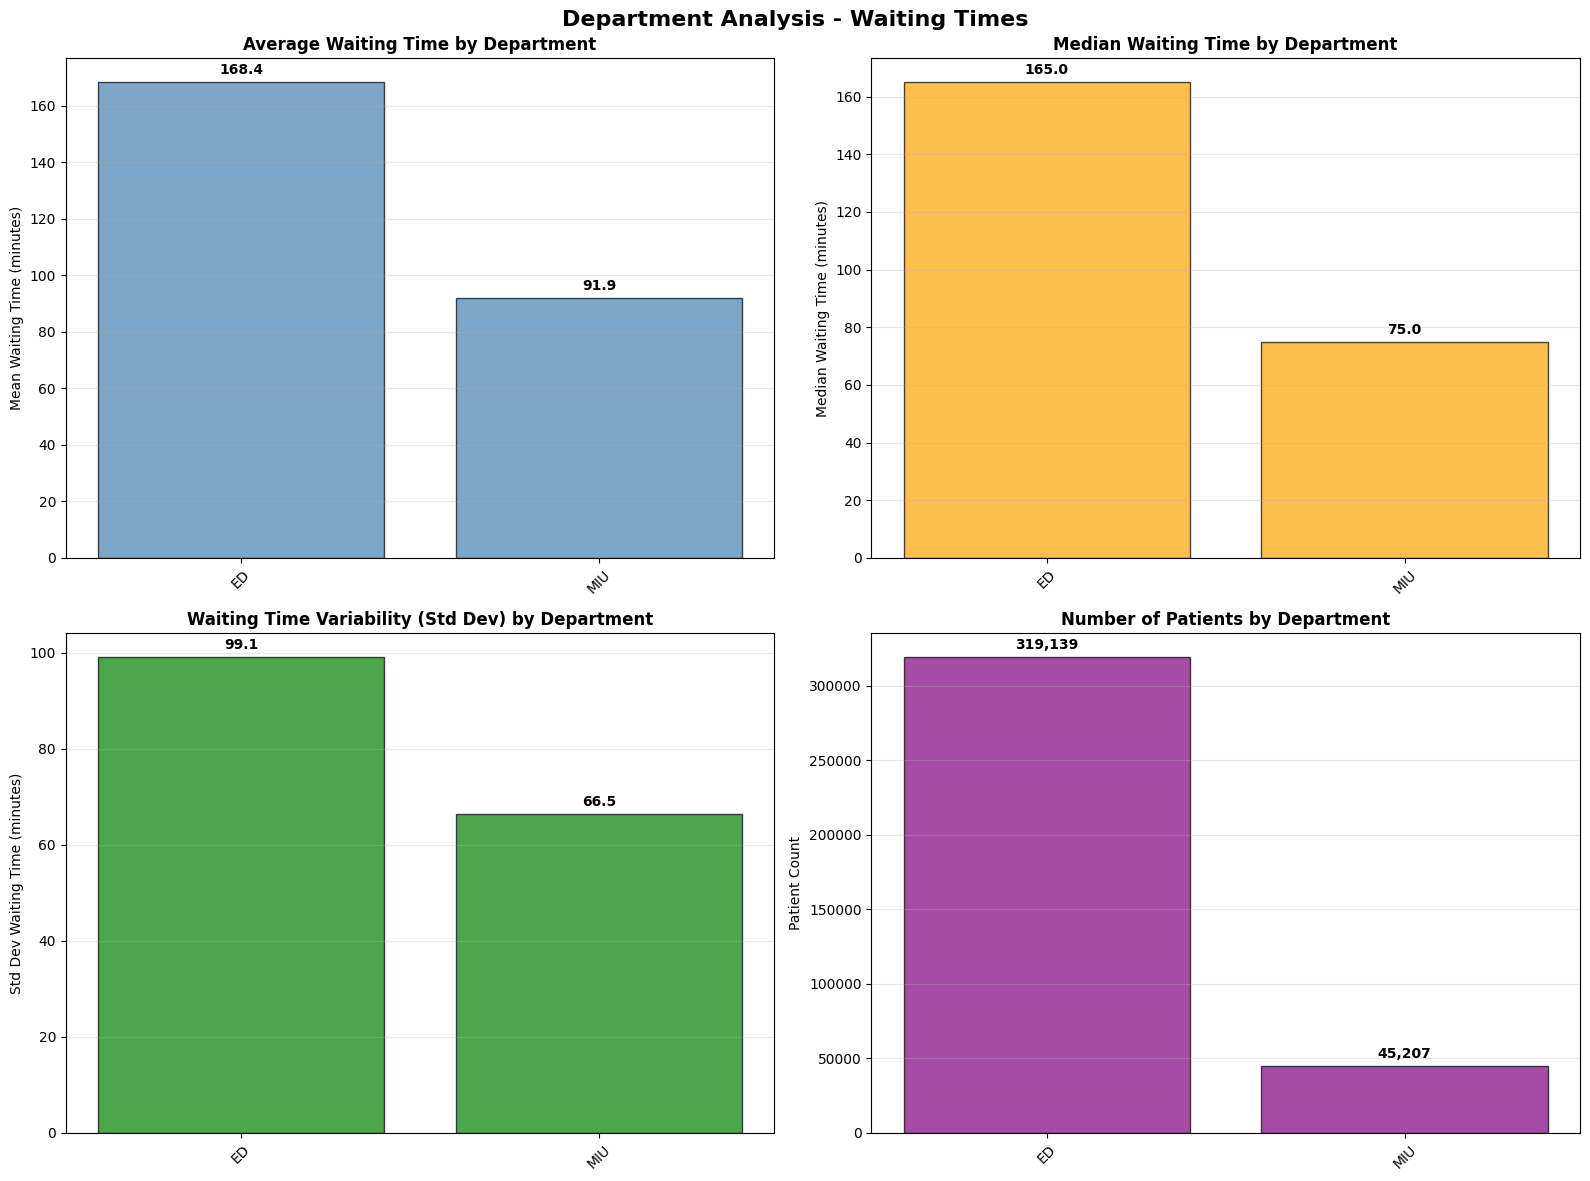

📊 Department Performance Summary:


TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [23]:
# Waiting Time by Department Type - Bar Chart Analysis
if department_column and waiting_time_column:
    plot_data = df[[department_column, waiting_time_column]].dropna()
    
    # Create mapping for wait time categories to numeric values
    wait_time_mapping = {
        '00-29': 15,
        '30-59': 45,
        '60-89': 75,
        '90-119': 105,
        '120-149': 135,
        '150-179': 165,
        '180-209': 195,
        '210-239': 225,
        '240-269': 255,
        '270-299': 285,
        '300-329': 315,
        '330-359': 345,
        '360+': 380
    }
    
    # Convert wait time categories to numeric
    plot_data['Wait_Time_Numeric'] = plot_data[waiting_time_column].map(wait_time_mapping)
    plot_data = plot_data.dropna(subset=['Wait_Time_Numeric'])
    
    # Calculate statistics by department
    dept_summary = plot_data.groupby(department_column)['Wait_Time_Numeric'].agg([
        'mean', 'median', 'std', 'count'
    ]).reset_index()
    
    # Replace MIU/OTHER with just MIU for display
    dept_summary['Department_Display'] = dept_summary[department_column].replace('MIU/OTHER', 'MIU')
    
    # Create subplots for different metrics
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Average waiting time
    axes[0, 0].bar(dept_summary['Department_Display'], dept_summary['mean'], 
                   color='steelblue', alpha=0.7, edgecolor='black')
    axes[0, 0].set_title('Average Waiting Time by Department', fontweight='bold')
    axes[0, 0].set_ylabel('Mean Waiting Time (minutes)')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(dept_summary['mean']):
        axes[0, 0].text(i, v + max(dept_summary['mean']) * 0.01, f'{v:.1f}', 
                       ha='center', va='bottom', fontweight='bold')
    
    # 2. Median waiting time
    axes[0, 1].bar(dept_summary['Department_Display'], dept_summary['median'], 
                   color='orange', alpha=0.7, edgecolor='black')
    axes[0, 1].set_title('Median Waiting Time by Department', fontweight='bold')
    axes[0, 1].set_ylabel('Median Waiting Time (minutes)')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(dept_summary['median']):
        axes[0, 1].text(i, v + max(dept_summary['median']) * 0.01, f'{v:.1f}', 
                       ha='center', va='bottom', fontweight='bold')
    
    # 3. Standard deviation
    axes[1, 0].bar(dept_summary['Department_Display'], dept_summary['std'], 
                   color='green', alpha=0.7, edgecolor='black')
    axes[1, 0].set_title('Waiting Time Variability (Std Dev) by Department', fontweight='bold')
    axes[1, 0].set_ylabel('Std Dev Waiting Time (minutes)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(dept_summary['std']):
        axes[1, 0].text(i, v + max(dept_summary['std']) * 0.01, f'{v:.1f}', 
                       ha='center', va='bottom', fontweight='bold')
    
    # 4. Patient count
    axes[1, 1].bar(dept_summary['Department_Display'], dept_summary['count'], 
                   color='purple', alpha=0.7, edgecolor='black')
    axes[1, 1].set_title('Number of Patients by Department', fontweight='bold')
    axes[1, 1].set_ylabel('Patient Count')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(dept_summary['count']):
        axes[1, 1].text(i, v + max(dept_summary['count']) * 0.01, f'{v:,}', 
                       ha='center', va='bottom', fontweight='bold')
    
    plt.suptitle('Department Analysis - Waiting Times', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Display summary table
    print("📊 Department Performance Summary:")
    dept_summary_display = dept_summary.copy()
    dept_summary_display.columns = ['Department', 'Department_Display', 'Mean Time', 'Median Time', 'Std Dev', 'Patient Count']
    dept_summary_display = dept_summary_display[['Department_Display', 'Mean Time', 'Median Time', 'Std Dev', 'Patient Count']].round(2)
    dept_summary_display.columns = ['Department', 'Mean Time', 'Median Time', 'Std Dev', 'Patient Count']
    
    # Add percentage of total patients
    total_patients = dept_summary_display['Patient Count'].sum()
    dept_summary_display['% of Total'] = (dept_summary_display['Patient Count'] / total_patients * 100).round(1)
    
    print(dept_summary_display.to_string(index=False))
    
    # Highlight key findings
    print(f"\n🔍 Key Findings:")
    fastest_dept = dept_summary.loc[dept_summary['mean'].idxmin(), 'Department_Display']
    slowest_dept = dept_summary.loc[dept_summary['mean'].idxmax(), 'Department_Display']
    most_patients = dept_summary.loc[dept_summary['count'].idxmax(), 'Department_Display']
    
    print(f"  • Fastest average service: {fastest_dept} ({dept_summary['mean'].min():.1f} time units)")
    print(f"  • Slowest average service: {slowest_dept} ({dept_summary['mean'].max():.1f} time units)")
    print(f"  • Highest patient volume: {most_patients} ({dept_summary['count'].max():,} patients)")
    
else:
    print("❌ Required columns not identified. Please run previous cells first.")

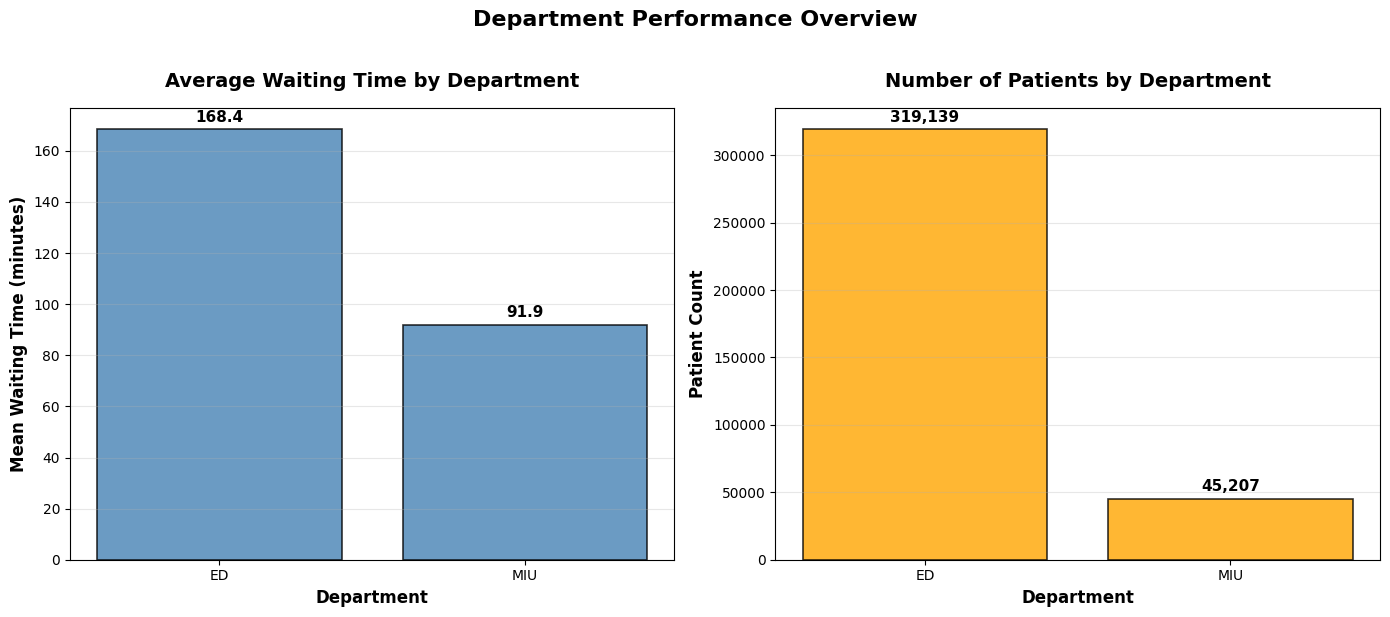

📊 Department Performance Overview:

ED:
  • Average waiting time: 168.4 minutes
  • Total patients: 319,139 (87.6% of total)

MIU:
  • Average waiting time: 91.9 minutes
  • Total patients: 45,207 (12.4% of total)

🔍 Key Insight:
  • MIU is 76.5 minutes faster on average


In [24]:
# Simplified Department Analysis - Average Waiting Times and Patient Count
if department_column and waiting_time_column:
    plot_data = df[[department_column, waiting_time_column]].dropna()
    
    # Create mapping for wait time categories to numeric values
    wait_time_mapping = {
        '00-29': 15,
        '30-59': 45,
        '60-89': 75,
        '90-119': 105,
        '120-149': 135,
        '150-179': 165,
        '180-209': 195,
        '210-239': 225,
        '240-269': 255,
        '270-299': 285,
        '300-329': 315,
        '330-359': 345,
        '360+': 380
    }
    
    # Convert wait time categories to numeric
    plot_data['Wait_Time_Numeric'] = plot_data[waiting_time_column].map(wait_time_mapping)
    plot_data = plot_data.dropna(subset=['Wait_Time_Numeric'])
    
    # Calculate statistics by department
    dept_summary = plot_data.groupby(department_column)['Wait_Time_Numeric'].agg([
        'mean', 'count'
    ]).reset_index()
    
    # Replace MIU/OTHER with just MIU for display
    dept_summary['Department_Display'] = dept_summary[department_column].replace('MIU/OTHER', 'MIU')
    
    # Create side-by-side plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # 1. Average waiting time
    bars1 = ax1.bar(dept_summary['Department_Display'], dept_summary['mean'], 
                    color='steelblue', alpha=0.8, edgecolor='black', linewidth=1.2)
    ax1.set_title('Average Waiting Time by Department', fontsize=14, fontweight='bold', pad=15)
    ax1.set_ylabel('Mean Waiting Time (minutes)', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Department', fontsize=12, fontweight='bold')
    ax1.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar, value in zip(bars1, dept_summary['mean']):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + max(dept_summary['mean']) * 0.01,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # 2. Patient count
    bars2 = ax2.bar(dept_summary['Department_Display'], dept_summary['count'], 
                    color='orange', alpha=0.8, edgecolor='black', linewidth=1.2)
    ax2.set_title('Number of Patients by Department', fontsize=14, fontweight='bold', pad=15)
    ax2.set_ylabel('Patient Count', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Department', fontsize=12, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar, value in zip(bars2, dept_summary['count']):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + max(dept_summary['count']) * 0.01,
                f'{value:,}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    plt.suptitle('Department Performance Overview', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Display summary
    print("📊 Department Performance Overview:")
    print("=" * 50)
    
    for i, row in dept_summary.iterrows():
        dept_name = row['Department_Display']
        avg_time = row['mean']
        patient_count = row['count']
        percentage = (patient_count / dept_summary['count'].sum()) * 100
        
        print(f"\n{dept_name}:")
        print(f"  • Average waiting time: {avg_time:.1f} minutes")
        print(f"  • Total patients: {patient_count:,} ({percentage:.1f}% of total)")
    
    # Performance comparison
    if len(dept_summary) == 2:
        time_diff = abs(dept_summary['mean'].iloc[0] - dept_summary['mean'].iloc[1])
        faster_dept = dept_summary.loc[dept_summary['mean'].idxmin(), 'Department_Display']
        print(f"\n🔍 Key Insight:")
        print(f"  • {faster_dept} is {time_diff:.1f} minutes faster on average")
        
else:
    print("❌ Required columns not identified. Please run previous cells first.")

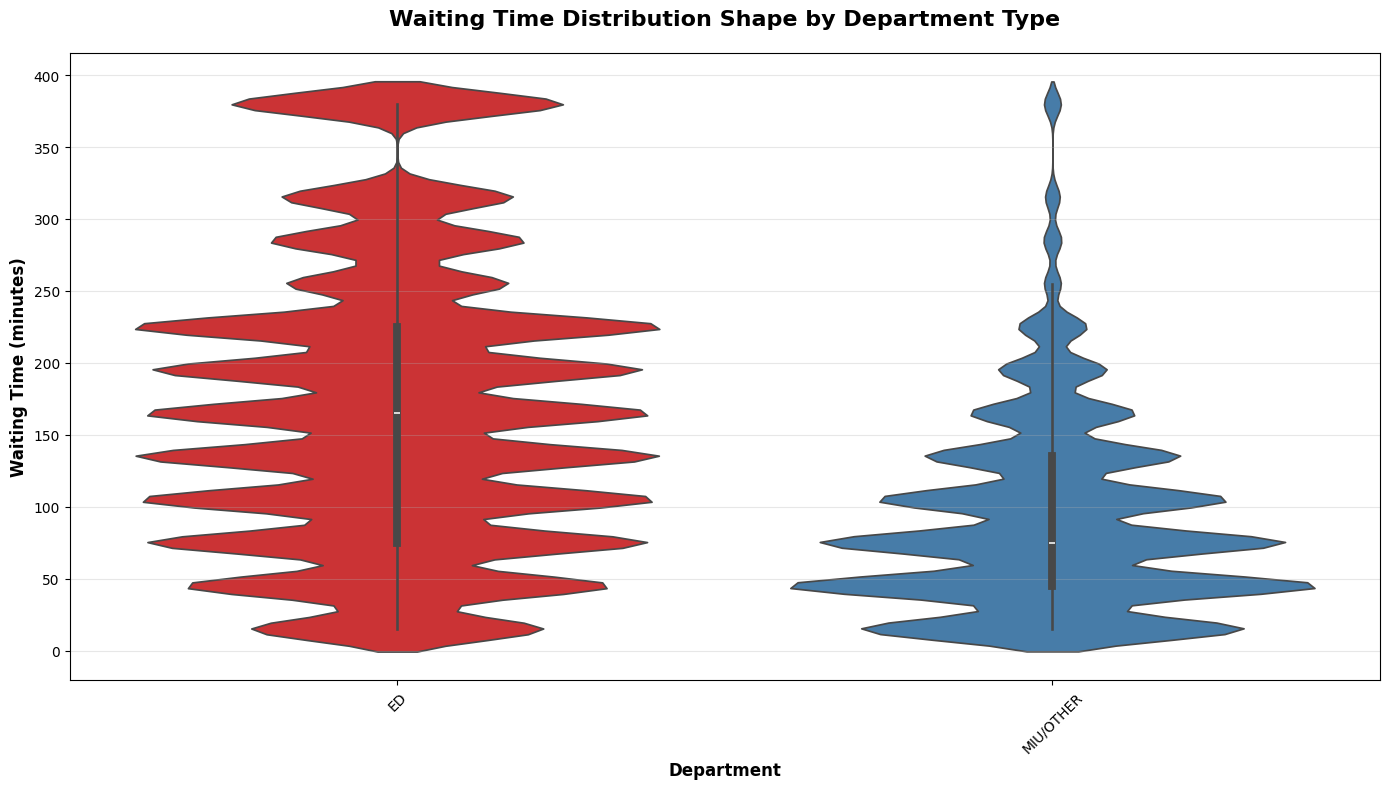

🎻 Violin Plot Analysis - Distribution Characteristics:

ED:
  • Sample size: 319,139
  • Mean ± Std: 168.43 ± 99.07
  • Median [IQR]: 165.00 [75.00-225.00]
  • Skewness: 0.449 (Approximately symmetric)
  • Kurtosis: -0.541 (Normal-tailed)
  • Outliers: 0 (0.0% of cases)

MIU/OTHER:
  • Sample size: 45,207
  • Mean ± Std: 91.95 ± 66.48
  • Median [IQR]: 75.00 [45.00-135.00]
  • Skewness: 1.278 (Right-skewed)
  • Kurtosis: 2.211 (Heavy-tailed)
  • Outliers: 929 (2.1% of cases)

🏥 MIU/OTHER vs ED Comparison:
  • MIU/OTHER median waiting time: 75.00
  • ED median waiting time: 165.00
  • Difference: 90.00
  • MIU/OTHER has shorter median waiting times
  • MIU/OTHER distribution: More skewed
  • ED distribution: More symmetric


In [20]:
# Waiting Time by Department Type - Violin Plot
if department_column and waiting_time_column:
    plot_data = df[[department_column, waiting_time_column]].dropna()
    
    # Create mapping for wait time categories to numeric values
    wait_time_mapping = {
        '00-29': 15,
        '30-59': 45,
        '60-89': 75,
        '90-119': 105,
        '120-149': 135,
        '150-179': 165,
        '180-209': 195,
        '210-239': 225,
        '240-269': 255,
        '270-299': 285,
        '300-329': 315,
        '330-359': 345,
        '360+': 380
    }
    
    # Convert wait time categories to numeric
    plot_data['Wait_Time_Numeric'] = plot_data[waiting_time_column].map(wait_time_mapping)
    plot_data = plot_data.dropna(subset=['Wait_Time_Numeric'])
    
    plt.figure(figsize=(14, 8))
    
    # Create violin plot
    sns.violinplot(data=plot_data, x=department_column, y='Wait_Time_Numeric', 
                   palette='Set1', inner='box')
    
    plt.title('Waiting Time Distribution Shape by Department Type', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Department', fontsize=12, fontweight='bold')
    plt.ylabel('Waiting Time (minutes)', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Analysis of distribution shapes
    print("🎻 Violin Plot Analysis - Distribution Characteristics:")
    print("=" * 60)
    
    for dept in plot_data[department_column].unique():
        dept_data = plot_data[plot_data[department_column] == dept]['Wait_Time_Numeric']
        
        if len(dept_data) > 0:
            # Calculate distribution metrics
            skewness = stats.skew(dept_data)
            kurtosis = stats.kurtosis(dept_data)
            
            print(f"\n{dept}:")
            print(f"  • Sample size: {len(dept_data):,}")
            print(f"  • Mean ± Std: {dept_data.mean():.2f} ± {dept_data.std():.2f}")
            print(f"  • Median [IQR]: {dept_data.median():.2f} [{dept_data.quantile(0.25):.2f}-{dept_data.quantile(0.75):.2f}]")
            print(f"  • Skewness: {skewness:.3f} ({'Right-skewed' if skewness > 0.5 else 'Left-skewed' if skewness < -0.5 else 'Approximately symmetric'})")
            print(f"  • Kurtosis: {kurtosis:.3f} ({'Heavy-tailed' if kurtosis > 1 else 'Light-tailed' if kurtosis < -1 else 'Normal-tailed'})")
            
            # Outlier detection using IQR method
            Q1 = dept_data.quantile(0.25)
            Q3 = dept_data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = dept_data[(dept_data < lower_bound) | (dept_data > upper_bound)]
            
            print(f"  • Outliers: {len(outliers)} ({len(outliers)/len(dept_data)*100:.1f}% of cases)")
    
    # Compare departments if MIU and ED are available
    miu_data = plot_data[plot_data[department_column] == 'MIU/OTHER']['Wait_Time_Numeric'] if 'MIU/OTHER' in plot_data[department_column].values else None
    ed_data = plot_data[plot_data[department_column] == 'ED']['Wait_Time_Numeric'] if 'ED' in plot_data[department_column].values else None
    
    if miu_data is not None and ed_data is not None and len(miu_data) > 0 and len(ed_data) > 0:
        print(f"\n🏥 MIU/OTHER vs ED Comparison:")
        print(f"  • MIU/OTHER median waiting time: {miu_data.median():.2f}")
        print(f"  • ED median waiting time: {ed_data.median():.2f}")
        print(f"  • Difference: {abs(miu_data.median() - ed_data.median()):.2f}")
        print(f"  • MIU/OTHER has {'shorter' if miu_data.median() < ed_data.median() else 'longer'} median waiting times")
        
        # Distribution comparison
        miu_skew = stats.skew(miu_data)
        ed_skew = stats.skew(ed_data)
        print(f"  • MIU/OTHER distribution: {'More symmetric' if abs(miu_skew) < abs(ed_skew) else 'More skewed'}")
        print(f"  • ED distribution: {'More symmetric' if abs(ed_skew) < abs(miu_skew) else 'More skewed'}")
        
else:
    print("❌ Required columns not identified. Please run the data exploration cell first.")